In [1]:
import xarray as xr
import numpy as np
from xhistogram.xarray import histogram
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
def histsum_ds(ds,bin_data,bins,dim):
    ds = ds.copy()
    ds_rebinned = xr.Dataset()
    for var in ds.data_vars:
        if ds[var].dtype == 'float32':
            nanmask = np.isnan(ds[var])
            ds_rebinned[var] = histogram(
                bin_data.where(~nanmask), bins=[bins], dim=dim, weights=(ds[var]*ds['volcello']).where(~nanmask)
            )
    return ds_rebinned

In [3]:
# Load grid data
directory = '/archive/gam/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/history/08990101.ocean_static_no_mask_table.nc'
grid = xr.open_dataset(directory)

### Seasonality of phytoplankton and zooplankton

In [4]:
# Specify paths
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
pp_cobalt = 'ocean_cobalt_omip_tracers_month_z'
pp_mom6 = 'ocean_monthly_z'
averages = '/av/monthly_5yr/'
years = '0901-0905'
months = '*'
filename_cobalt = pp_cobalt+'.'+years+'.'+months+'.nc'
filename_mom6 = pp_mom6+'.'+years+'.'+months+'.nc'
path_cobalt = rootdir+pp_cobalt+averages+filename_cobalt
path_mom6 = rootdir+pp_mom6+averages+filename_mom6
# Load data
ds_cobalt = xr.open_mfdataset(path_cobalt)
ds_mom6 = xr.open_mfdataset(path_mom6)

/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  del sys.path[0]
/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the data

In [5]:
# Calculate bgc variables as a function of temperature
bins_theta = np.arange(-2,32,1)
ds_cobalt_rebinned = histsum_ds(ds_cobalt,ds_mom6.thetao,bins=bins_theta,dim=['xh','yh','z_l'])

In [6]:
ds_cobalt_rebinned.phyc.load();
ds_cobalt_rebinned.zooc.load();

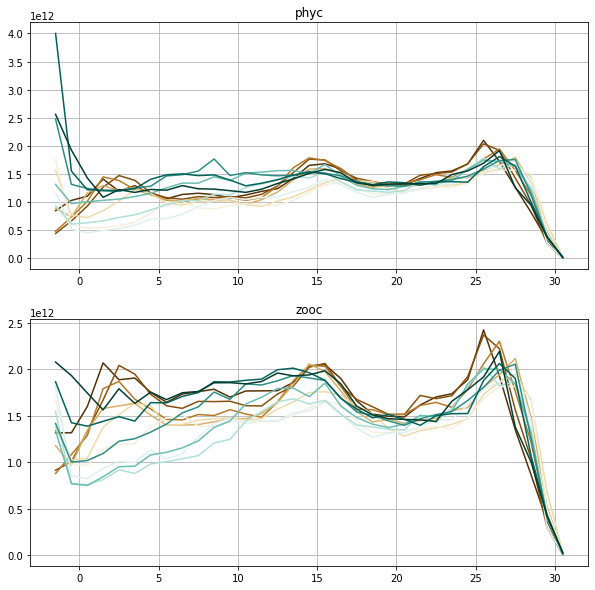

In [7]:
start = 0
stop = 1
N = 12
colors = [ cm.BrBG(x) for x in np.linspace(start, stop, N) ]

fig,ax = plt.subplots(figsize = (10,10), nrows = 2)
for t in range(12):
    ax[0].plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.phyc.isel(time=t),color=colors[t])
    ax[1].plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.zooc.isel(time=t),color=colors[t])

ax[0].set_title('phyc')
ax[0].grid()
ax[1].set_title('zooc')
ax[1].grid()

### Annual mean rates of biogeochemical processes

In [9]:
# Specify paths
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
pp_cobalt = 'ocean_cobalt_omip_rates_year_z'
pp_mom6 = 'ocean_annual_z'
averages = '/av/annual_5yr/'
years = '1101-1105'
months = 'ann'
filename_cobalt = pp_cobalt+'.'+years+'.'+months+'.nc'
filename_mom6 = pp_mom6+'.'+years+'.'+months+'.nc'
path_cobalt = rootdir+pp_cobalt+averages+filename_cobalt
path_mom6 = rootdir+pp_mom6+averages+filename_mom6
# Load data
ds_cobalt = xr.open_mfdataset(path_cobalt)
ds_mom6 = xr.open_mfdataset(path_mom6)

In [144]:
# Calculate bgc variables as a function of temperature
bins_theta = np.arange(-2,32,1)
ds_cobalt_rebinned = histsum_ds(ds_cobalt,ds_mom6.thetao,bins=bins_theta,dim=['xh','yh','z_l','time'])

In [158]:
# Separately histogram sinking term, to integrate in area rather than volume
expc_rebinned = histogram(ds_mom6.thetao,bins=[bins_theta],dim=['xh','yh','z_l','time'],weights=ds_cobalt.expc*grid.areacello)
expc_rebinned.load();

In [146]:
ds_cobalt_rebinned.pp.load();
ds_cobalt_rebinned.remoc.load();
ds_cobalt_rebinned.graz.load();
ds_cobalt_rebinned.expc.load();
ds_cobalt_rebinned.volcello.load();
expc_rebinned.load()

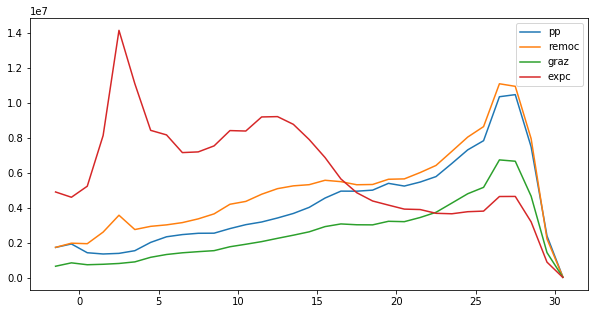

In [161]:
fig,ax = plt.subplots(figsize = (10,5), nrows = 1)
ax.plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.pp,label='pp')
ax.plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.remoc,label='remoc')
ax.plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.graz,label='graz')
ax.plot(expc_rebinned.thetao_bin,expc_rebinned,label='expc')
ax.legend()

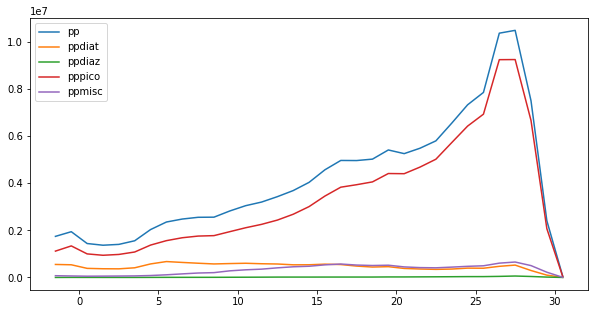

In [168]:
fig,ax = plt.subplots(figsize = (10,5), nrows = 1)
ax.plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.pp,label='pp')
ax.plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.ppdiat,label='ppdiat')
ax.plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.ppdiaz,label='ppdiaz')
ax.plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.pppico,label='pppico')
ax.plot(ds_cobalt_rebinned.thetao_bin,ds_cobalt_rebinned.ppmisc,label='ppmisc')
ax.legend()